In [1]:
import teacher_model as tm
import quantum_computer as qc
import quantum_trainer as qt
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Define my teacher model
my_teacher_model = tm.TeacherModel()

Select TeacherModel:

1. 'lin'  -> bx+c
2. 'quad' -> ax^2+bx+c
3. 'sin'  -> a*sin(bx+c)
4. 'cos'  -> a*cos(bx+c)
5. 'tan'  -> a*tan(bx+c)
6. 'exp'  -> a*exp(bx+c)
7. 'log'  -> a*log(|bx+c|)

To select: use TeacherModel().config(select_model='_<your_selection_here>_') 
 

Config Setting Available:

* select_model [str]: (See Above)
* x_lower_limit [int]: The lower bound of x data coordinate (beware of singularities)
* x_upper_limit [int]: The upper bound of x data coordinate (beware of singularities)
* number_of_points [int]: The number of data points that you want to use for training
* a,b,c [float]: Model Parameters


Note: Training Data is initialized


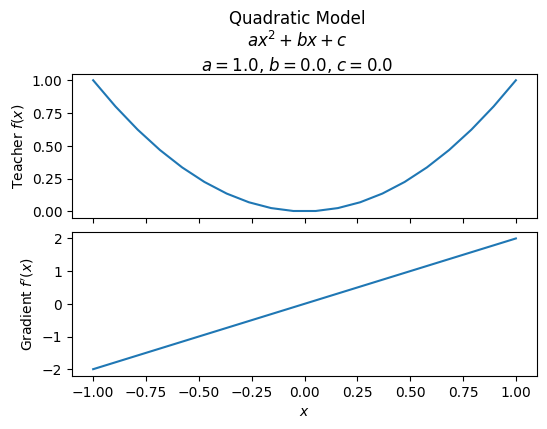

In [3]:
my_teacher_model.config(select_model="quad", x_lower_limit=-1.0, x_upper_limit=1.0, number_of_points=20, a=1.0, b=0, c=0)
my_teacher_model.plot_model()

In [4]:
# Define quatnum_computer

# Data Encoding
my_quantum_encoding = qc.QuantumEncoding()
my_quantum_encoding.config(select_encoding="rzacos_ryasin")

Select QuantumEncoding:

1. 'ryasin'        -> RY(arcsin(x))
2. 'rzacos_ryasin' -> RZ(arccos(x^2))RY(arcsin(x))

To select: use QuantumEncoding().config(select_encoding='_<your_selection_here>_') 
 



In [5]:
# Entangling block
my_entangling = qc.HamlitonianMixerBlock()

Note: 'HamlitonianMixerBlock' class does not have any user config settings.


In [6]:
# Single qubit rotation block
my_parameterised = qc.SingleQubitRotationBlock()

Note: 'SingleQubitRotationBlock' class does not have any user config settings.


In [7]:
# Quantum Measurement
my_measurement = qc.QuantumMeasurement()

Select QuantumMeasurement:

1. 'first_qubit_Z'  -> To measure <Z> expectation of the first qubit.

To select: use QuantumMeasurement().config(select_measurement='_<your_selection_here>_') 
 



In [8]:
my_measurement.config(select_measurement = "first_qubit_Z")

In [9]:
# Package all components into a quantum computer
my_quantum_computer = qc.QuantumComputer()

Note: 'QuantumComputer' uses the Quantum Circuit Learning Model.

Config Settings Available:

* number_of_qubits [int]: The number of qubit that the quantum computer uses for simulation.
* depth [int]: The number of repeating layers of 'HamlitonianMixerBlock' and 'SingleQubitRotationBlock'.

To select: use QuantumComputer().config() 
 

Required Component Inputs to QuantumComputer:

1. Encode: 'QuantumEncoding' class
2. A : 'HamlitonianMixerBlock' class
3. B : 'SingleQubitRotationBlock' class
4. Observable: 'QuantumMeasurement' class

To input: use QuantumComputer().input(Encode, A, B, Observable)
Note: Please run '.config()' first before running '.inputs()' 



In [10]:
my_quantum_computer.config(number_of_qubits=6, depth=6) 

In [11]:
my_quantum_computer.inputs(Encode=my_quantum_encoding, A=my_entangling, B=my_parameterised, Observable=my_measurement)

In [12]:
# Define quantum trainer
my_trainer = qt.QuantumTrainer()

Select QuantumTrainer Optimiser:

1. 'GD'  -> Standard Gradient Descent


Select QuantumTrainer Loss Function:

1. 'quad_loss'  -> Quadratic Loss


To select: use QuantumTrainer().config(select_optimiser='_<?>_', select_loss='_<?>_') 
 

Config Setting Available:

* max_training_steps [int]: The maximum number of training steps for optimisation.
* learning_rate [float]: The multiplier for gradient descent. (Only used by some supported optimisers)


Required Component Inputs to QuantumTrainer:

1. teacher_model: 'TeacherModel' class
2. quantum_computer : 'QuantumComputer' class

To input: use QuantumTrainer().input(teacher_model, quantum_computer)
Note: Please run '.config()' first before running '.inputs()' 



In [13]:
my_trainer.config(select_optimiser = "GD", select_loss="quad_loss", max_training_steps=100, learning_rate=0.01)
my_trainer.inputs(my_teacher_model, my_quantum_computer)

In [14]:
my_trainer.train()

4.802478444147772
4.3735242645334
4.010188710820694
3.693566805852752
3.4117654310322365
3.1571184144208937
2.9245826589666892
2.7107715266748205
2.5133513654555566
2.3306555929598076
2.1614350112297167
2.0046964870356163
1.8596002815819614
1.7253966537410221
1.6013886244087812
1.4869118415662967
1.3813252561255758
1.2840082785305245
1.1943614906414406
1.1118089929687243
1.0358011812783672
0.9658172469983959
0.9013670396430211
0.8419921579152234
0.7872662795463852
0.7367948213246894
0.690214058350348
0.6471898399158502
0.607416030003065
0.5706127817913408
0.5365247337433553
0.5049191935280806
0.4755843572851397
0.4483275963543546
0.42297383164696944
0.3993640069637545
0.37735366623830524
0.3568116353443464
0.3376188062511948
0.31966701952589044
0.30285804014042145
0.28710262100701267
0.2723196484610545
0.2584353639197157
0.24538265608344234
0.23310041826375139
0.2215329656795809
0.21062950784426213
0.2003436714526694
0.1906330694653091
0.18145891236842182
0.17278565786371736
0.16458069

Text(0.5, 0.98, 'Quantum Circuit Learning\n Quadratic Model')

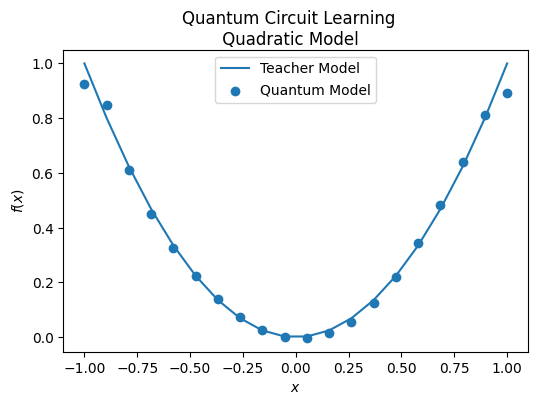

In [19]:
predict_y = []
for data_iter in range(20):
    predict_result = my_quantum_computer.run_qc(my_teacher_model.training_data["x_data"][data_iter])
    predict_y.append(predict_result["output_data"])
    
fig1, ax1 = plt.subplots(dpi=100)
ax1.scatter(my_teacher_model.training_data["x_data"], 1.6837029309937699 * np.asarray(predict_y),label="Quantum Model")
y = np.square(my_teacher_model.training_data["x_data"]) 
ax1.plot(my_teacher_model.training_data["x_data"],y,label="Teacher Model")
ax1.set_ylabel(r"$f(x)$")
ax1.set_xlabel(r"$x$")
ax1.legend()
fig1.suptitle("Quantum Circuit Learning\n Quadratic Model")